In [32]:
from copyreg import pickle
import sys,os
import pickle
from sklearn.metrics import accuracy_score

from torch import softmax
sys.path.append(os.pardir)  ## 为了导入父目录种的文件进行的设定
import numpy as np
import os
from PIL import Image
from dataset.mnist import load_mnist

## 导入训练数据
(x_train,t_train),(x_test,t_test) = load_mnist(flatten=True,normalize=False)

## 输出数据的形状
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def img_show(img):
    ## 将Numpy数组的图像数据转换为PIL用的数据对象
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

## 取出训练数据第一张图像
img = x_train[0]
label = t_train[0]
print(label)

# img = img.reshape(28,28) ## 回复图像尺寸
# img_show(img)


def get_data():
    (x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,flatten=True,one_hot_label=False)

    return x_test,t_test


## 读取学习到的权重参数
def init_network():
    with open("sample_weight.pkl","rb") as f:
        network = pickle.load(f)
    return network

## 输出层激活函数  输出概率分布
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  ## 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a


    return y
def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']

    a1 = np.dot(x,W1)  + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)

    return y

x,t = get_data() ## 加载
network = init_network()  ## 加载参数

## 计算正确分类个数
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y) ## 获取改了最高的元素的索引

    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) 

(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
Accuracy:0.9352


In [33]:
x,t = get_data()
network = init_network()

batch_size = 100 ## 批数量
accuracy_count = 0

## 指定步长
for i in range(0,len(x),batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis = 1)  ## 指定第二维度
    accuracy_count += np.sum(p == t[i:i + batch_size])


print("Accuracy:" + str(float(accuracy_cnt) / len(x))) 


Accuracy:0.9352


In [34]:

## 均方误差
def mean_squared_error(y,t):
    return 0.5 * np.sum((y - t) ** 2)


t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

mean_squared_error(np.array(y),np.array(t))

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
mean_squared_error(np.array(y),np.array(t))




0.5975

In [35]:
from torch import det

def cross_entroy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))


t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

cross_entroy_error(np.array(y),np.array(t))

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entroy_error(np.array(y),np.array(t))


2.302584092994546

In [36]:
from msilib import type_binary
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,flatten=True,one_hot_label=True)

print(x_train.shape)
print(t_train.shape)


train_size = x_train.shape[0]  ## 打印第一个维度大小
print(train_size)
print(x_train.shape[1])  ## 打印第二个维度大小


batch_size  = 10
## 使用np.random.choice() 可以从指定的数字中随机选取想要的数字 选10个
batch_mask = np.random.choice(train_size,batch_size)

print(batch_mask)
## 然后利用随机选取的数字下标 选择训练数据和标签
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch)
print(t_batch)


(60000, 784)
(60000, 10)
60000
784
[42721 14713 19750  8889 38184 46874 21893 42950  7772 10704]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [37]:
def cross_entroy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)

    batch_size = y.shape[0]  ## 计算第一维度

    return -np.sum(t * np.log(y + 1e-7)) / batch_size

    
        

In [38]:
def cross_entropy_error(y,t):

    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)

    batch_size = y.shape[0] ## 批量大小就是样本数量 预测值的第一维度

    ## batch进行正规化。计算单个数据的平均交叉熵误差
    return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7)) / batch_size





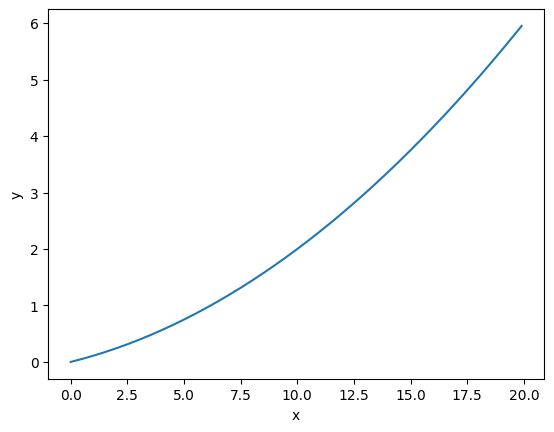

0.1999999999990898

In [39]:
## 采用中心微分的思想
def numerical_diff(f,x):
    h = 1e-4

    return (f(x + h) - f(x - h)) / (2 * h)

def function_1(x):
    return 0.01 * x**2 + 0.1 * x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0,20.0,0.1) ## 以0.1为单位从0~20的数组
y = function_1(x)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

numerical_diff(function_1,5)

In [40]:
def numerical_gradient(f,x):
    h = 1e-4

    grad = np.zeros_like(x) ## 生成和x形状相同的数组

    ## for循环遍历每一个x  然后求解偏导数
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x + h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)


        # f(x - h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)


        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val ## 还原值

    return grad

def function_2(x):

    return x[0]**2 + x[1]**2
import numpy as np
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [41]:
from matplotlib.pyplot import step


def gradient_descent(f,init_x,lr = 0.01,step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x) ## 每到一个函数位置 就计算下梯度 
        ## 找到函数下降最多的方向 然后更新函数值

        ## 更新x
        x -= lr * grad

    return x

init_x = np.array([-3.0,4.0])

gradient_descent(function_2,init_x = init_x,lr = 0.1,step_num=100)




array([-6.11110793e-10,  8.14814391e-10])

In [42]:
import sys,os
sys.path.append(os.pardir)
import numpy as np

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)  ## 使用高斯分布进行初始化

    ## 计算预测值
    def predict(self,x):
        return np.dot(x,self.W)

    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)  ## 计算交叉熵损失
        return loss

net  = simpleNet()
print(net.W) ## 权重参数

x = np.array([0.6,0.9])
p = net.predict(x)
print(p)


## 计算损失函数

t = np.array([0,0,1]) ## 正确解标签
net.loss(x,t)

## 求解梯度
def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f,net.W)
print(dW)



[[-1.55351302  0.48195981 -0.34283699]
 [-0.20344786  0.3108342  -0.36971525]]
[-1.11521089  0.56892667 -0.53844592]


IndexError: index 2 is out of bounds for axis 0 with size 2

In [55]:
import sys,os
sys.path.append(os.pardir)
from common.functions import * 
from common.gradient import numerical_gradient



class TwoLayerNet:

    def __init__(self,input_size,hidden_size,output_size,weight_init_std = 0.01):
        ## 初始化权重

        self.params = {}

        ## 使用高斯分布 生成第一层权重矩阵
        ## 隐藏层神经元 hidden_size
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size) ## 生成第一层的偏置矩阵

        ## 输出层神经元   output_size
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)

    ## 生成预测值
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']

        ## 计算隐藏层的输出
        a1 = np.dot(x,W1) + b1
        ## 隐藏层的激活函数
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2) ## 输出层的激活函数  输出概率值
        return y

    ## x: 输入数据  t:监督数据
    def loss(self,x,t):

        ## 计算预测值 然后和标签一起计算交叉熵损失
        y = self.predict(x)
        return cross_entropy_error(y,t)

    ## 计算精度
    def accuracy(self,x,t):
        ## 计算预测值
        y = self.predict(x)

        ## 取出第二维度：每一行最大值的索引
        y = np.argmax(y,axis = 1)
        t = np.argmax(t,axis = 1)

        accuracy = np.sum(y == t) / float(y.shape[0])

        return accuracy

    ## 输入数据   监督数据
    ## 计算梯度
    def numerical_gradient(self,x,t):

        loss_W = lambda W:self.loss(x,t)  ## 损失函数

        grads = {}  ## 保存每一层参数的梯度
        grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
        
        grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W,self.params['b2'])

        return grads

## 实例化一个两层网络
net = TwoLayerNet(input_size= 784,hidden_size= 100,output_size= 10)

print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

x = np.random.rand(10,784)  ## 输入数据
t = np.random.rand(10,10)  ## 随机生成标签

grads = net.numerical_gradient(x,t)  ## 计算一次梯度

print(grads['W1'].shape)
print(grads['W2'].shape) 


(784, 100)
(100,)
(100, 10)
(10,)


KeyboardInterrupt: 

In [57]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

train_loss_list = []


## 超参数

iters_num = 10000  ## 梯度下降迭代次数
train_size = x_train.shape[0]  ## 计算训练数据样本个数
batch_size = 100## 批处理大小
learning_rate = 0.1  ## 学习率

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

for i in range(iters_num):
    ## 获取mini_batch
    batch_mask = np.random.choice(train_size,batch_size)

    ## 批量获取数据
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    ## 计算梯度
    grad = network.numerical_gradient(x_batch,t_batch)

    ## 更新参数
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]

    # 记录学习过程
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)




KeyboardInterrupt: 